In [1]:
#importing required lib
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#required libs if not preinstalled
!pip install neattext
!pip install TextBlob



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("covid19_tweets.csv")

In [5]:
df.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


In [6]:
#text preprocessing 
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [7]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [8]:
df['source'].value_counts()

source
Twitter Web App              56891
Twitter for Android          40179
Twitter for iPhone           35472
TweetDeck                     8543
Hootsuite Inc.                7321
                             ...  
DataBlogger                      1
Dear_Assistant                   1
OnlyPultCom                      1
Washington Square Parkerz        1
Radiology: AI app                1
Name: count, Length: 610, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

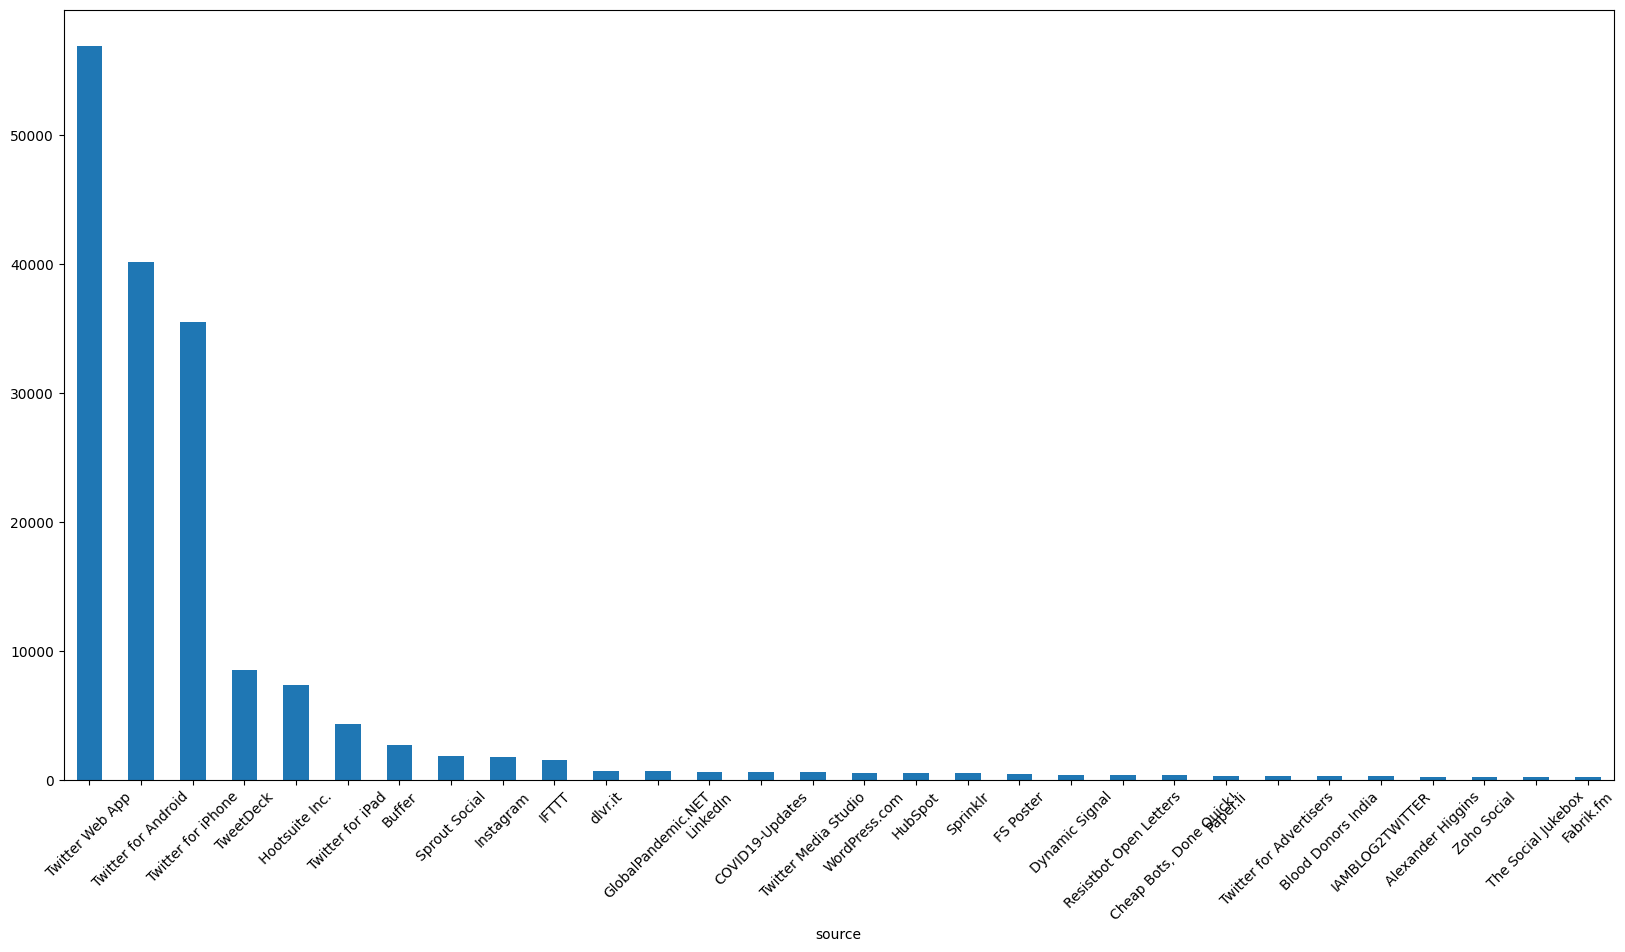

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show

In [10]:
#textAnalysis
import neattext.functions as nfx
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
#cleaning userhandles ,hastags,urls,emojies,special char
df['extracted_hashtags']=df['text'].apply(nfx.extract_hashtags)

In [12]:
df[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,[],NaN
1,[],NaN
2,[#COVID19],['COVID19']
3,[#COVID19],['COVID19']
4,"[#CoronaVirusUpdates, #COVID19]","['CoronaVirusUpdates', 'COVID19']"
...,...,...
179103,[#WearAMask],['WearAMask']
179104,[#COVID19],['COVID19']
179105,[],NaN
179106,[#COVID19],['COVID19']


In [13]:
df['clean_tweet']=df['text'].apply(nfx.remove_hashtags)

In [14]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift has give me is an ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n@kansa...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


In [15]:
df['clean_tweet']=df['clean_tweet'].apply(nfx.remove_userhandles)

In [16]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from \n      cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [17]:
df['clean_tweet']=df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [18]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [19]:
df['clean_tweet']=df['clean_tweet'].apply(nfx.remove_urls)
df['clean_tweet']=df['clean_tweet'].apply(nfx.remove_puncts)

In [20]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and wouldnt it have made more sense to ha...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax We all cl...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challenge I n...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 The year of insanity Lol
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena Its a trib...
179106,"More than 1,200 students test positive for #CO...",More than 1200 students test positive for at m...


In [21]:
from textblob import TextBlob

In [22]:
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment_polarity= blob.sentiment.polarity
    sentiment_subjectivity=blob.sentiment.subjectivity   
    if sentiment_polarity > 0:
        sentiment_label ='positive'
    elif sentiment_polarity <0:
        sentiment_label = 'negative'
    else:
        sentiment_label='neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
             'sentiment':sentiment_label}
    return result


In [23]:
ex1=df['clean_tweet'].iloc[0]

In [24]:
get_sentiment(ex1)

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'negative'}

In [25]:
df['sentiment_results']=df['clean_tweet'].apply(get_sentiment)


In [26]:
df['sentiment_results']

0         {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1         {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3         {'polarity': 0.0, 'subjectivity': 0.3571428571...
4         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                                ...                        
179103    {'polarity': 0.2, 'subjectivity': 0.2, 'sentim...
179104    {'polarity': 0.8, 'subjectivity': 0.7, 'sentim...
179105    {'polarity': 0.3, 'subjectivity': 1.0, 'sentim...
179106    {'polarity': 0.26325757575757575, 'subjectivit...
179107    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 179108, dtype: object

In [27]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,-0.25,0.25,negative


In [28]:
df=df.join(pd.json_normalize(df['sentiment_results']))

In [29]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.25,0.250000,negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],Hey and wouldnt it have made more sense to ha...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.50,0.500000,positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[#COVID19],Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[#COVID19],The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571...",0.00,0.357143,neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[#CoronaVirusUpdates, #COVID19]",25 July : Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,neutral


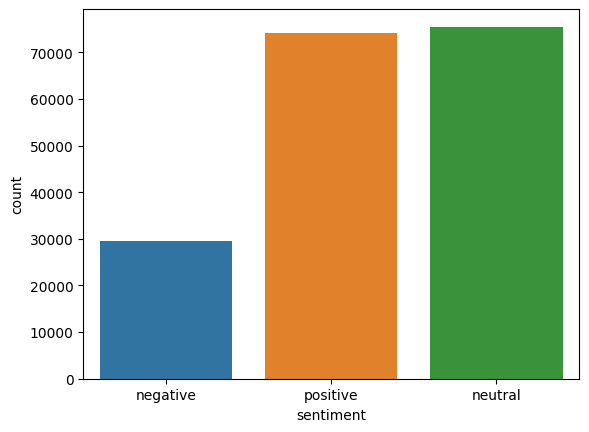

In [30]:
sns.countplot(data=df, x='sentiment')
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['sentiment']= le.fit_transform(df['sentiment'])

In [32]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.250000,0.250000,0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],Hey and wouldnt it have made more sense to ha...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.500000,0.500000,2
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[#COVID19],Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,1
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[#COVID19],The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571...",0.000000,0.357143,1
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[#CoronaVirusUpdates, #COVID19]",25 July : Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False,[#WearAMask],Thanks for nominating me for the challenge I n...,"{'polarity': 0.2, 'subjectivity': 0.2, 'sentim...",0.200000,0.200000,2
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False,[#COVID19],2020 The year of insanity Lol,"{'polarity': 0.8, 'subjectivity': 0.7, 'sentim...",0.800000,0.700000,2
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False,[],A powerful painting by Juan Lucena Its a trib...,"{'polarity': 0.3, 'subjectivity': 1.0, 'sentim...",0.300000,1.000000,2
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False,[#COVID19],More than 1200 students test positive for at m...,"{'polarity': 0.26325757575757575, 'subjectivit...",0.263258,0.515152,2


In [33]:
df['clean_tweet']

0         If I smelled the scent of hand sanitizers toda...
1         Hey and  wouldnt it have made more sense to ha...
2          Trump never once claimed was a hoax We all cl...
3          The one gift has give me is an appreciation f...
4                        25 July : Media Bulletin on Novel 
                                ...                        
179103    Thanks for nominating me for the challenge I n...
179104                       2020 The year of insanity Lol 
179105     A powerful painting by Juan Lucena Its a trib...
179106    More than 1200 students test positive for at m...
179107                            I stop when I see a Stop 
Name: clean_tweet, Length: 179108, dtype: object

In [34]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw')  # Uninstall the OMW data


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [35]:
import nltk
nltk.download('omw-1.4')



[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [36]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

corpus = []
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

for i in range(0, 179108):
    clean_tweet = re.sub('[^a-zA-Z]', ' ', df['clean_tweet'][i])
    clean_tweet = clean_tweet.lower()
    clean_tweet = clean_tweet.split()
    all_stopwords = stopwords.words('english')

    # Apply stemming
    stemmed_tweet = [ps.stem(word) for word in clean_tweet if word not in set(all_stopwords)]

    # Apply lemmatization
    lemmatized_tweet = [lemmatizer.lemmatize(word) for word in stemmed_tweet]

    cleaned_tweet = ' '.join(lemmatized_tweet)
    corpus.append(cleaned_tweet)





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(corpus)
y=df.iloc[:,-1].values

In [38]:
print(cv.get_feature_names_out())

['aa' 'aaa' 'aaaaaah' ... 'zygot' 'zz' 'zzzami']


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=40,criterion='gini',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40, random_state=0)

In [41]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [1 0]
 ...
 [2 0]
 [1 1]
 [2 2]]


In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report
print(confusion_matrix(y_test,y_pred))


[[ 4062   877   885]
 [  365 13984   878]
 [  473  1459 12839]]


In [43]:
accuracy_score(y_test,y_pred)

0.8621796661269611

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      5824
           1       0.86      0.92      0.89     15227
           2       0.88      0.87      0.87     14771

    accuracy                           0.86     35822
   macro avg       0.86      0.83      0.84     35822
weighted avg       0.86      0.86      0.86     35822



In [45]:
test=['love life']
test_count=cv.transform(test)
test_predict=classifier.predict(test_count)
test_predict

array([2])

In [46]:
test=['cry']
test_count=cv.transform(test)
test_predict=classifier.predict(test_count)
test_predict

array([1])

In [47]:
test=['dead']
test_count=cv.transform(test)
test_predict=classifier.predict(test_count)
test_predict

array([0])

In [48]:
test=['Friends show']
test_count=cv.transform(test)
test_predict=classifier.predict(test_count)
test_predict

array([1])

In [49]:
test=['joey tribbiani']
test_count=cv.transform(test)
test_predict=classifier.predict(test_count)
test_predict

array([1])

In [50]:
test=['i hate the movie']
test_count=cv.transform(test)
test_predict=classifier.predict(test_count)
test_predict

array([0])

In [51]:
test=['zombie attack']
test_count=cv.transform(test)
test_predict=classifier.predict(test_count)
test_predict

array([1])

In [52]:
print(f1_score(y_test, y_pred, average='macro'))


0.8394358598640274


In [53]:
import pickle


# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)


In [55]:
with open('count_vectorizer.pkl', 'wb') as file:
    pickle.dump(cv, file)